In [1]:
import numpy as np
import pandas as pd
from ta.utils import dropna
from ta.volatility import BollingerBands
import config
import ccxt
from bsedata.bse import BSE
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [20]:
#When the price timeseries p(t) crosses the EMA timeseries e(t) from below, we will close any existing short position and 
#go long (buy) one unit of the asset.

#When the price timeseries p(t) crosses the EMA timeseries e(t) from above, we will close any existing long position and 
#go short (sell) one unit of the asset.
'''
Go long condition: If pi(t)>ei(t), then wi(t)=1
Go short condition: If pi(t)<ei(t), then wi(t)=−1
'''

'\nGo long condition: If pi(t)>ei(t), then wi(t)=1\nGo short condition: If pi(t)<ei(t), then wi(t)=−1\n'

In [21]:
# Calculating the long-window simple moving average
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-25,5248.038506,5330.153506,5162.983994,5242.091484,5242.091484,2814093.08
2021-05-26,5252.589507,5335.653506,5167.094995,5247.761982,5247.761982,2823934.48
2021-05-27,5258.139009,5341.005005,5171.929995,5252.578984,5252.578984,2825765.09
2021-05-28,5263.374009,5345.025005,5176.110996,5255.344985,5255.344985,2802381.84
2021-05-31,5266.224009,5347.947007,5178.990996,5258.672485,5258.672485,2791647.83


In [22]:
# Calculating the short-window simple moving average
short_rolling = data.rolling(window=20).mean()
short_rolling

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-06,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-07,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-08,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-25,5451.080005,5550.414990,5384.999976,5479.519971,5479.519971,3014802.80
2021-05-26,5495.730005,5595.662476,5426.977490,5524.824976,5524.824976,3028390.25
2021-05-27,5538.977515,5619.269971,5463.777490,5544.889990,5544.889990,2707197.05


In [23]:
ema_short = data.ewm(span=20, adjust=False).mean()
ema_short                  

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-03,3130.100098,3165.000000,3102.300049,3111.850098,3099.281738,7.307280e+05
2019-05-06,3123.995326,3158.238095,3095.033378,3104.464379,3091.925828,7.531812e+05
2019-05-07,3117.224334,3149.815424,3086.706398,3096.139204,3083.634250,7.738558e+05
2019-05-08,3107.202969,3137.166336,3068.924837,3079.487856,3067.050152,8.101574e+05
2019-05-09,3087.469353,3123.321928,3051.408186,3069.189022,3056.792911,8.992123e+05
...,...,...,...,...,...,...
2021-05-25,5437.752090,5511.987639,5368.133485,5440.494966,5440.494966,2.379969e+06
2021-05-26,5457.013796,5538.922131,5388.892210,5471.985912,5471.985912,2.431091e+06
2021-05-27,5487.769643,5562.086681,5413.854857,5492.006320,5492.006320,2.404567e+06


In [24]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = data - ema_short
trading_positions_raw.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-25,202.247910,146.812165,213.866515,178.154937,178.154937,-1.064423e+06
2021-05-26,182.986204,255.877673,197.207888,299.163990,299.163990,4.856550e+05
2021-05-27,292.180552,220.063221,237.145143,190.193875,190.193875,-2.519771e+05
2021-05-28,213.732228,170.016812,161.269504,107.434758,107.434758,-7.945548e+05
2021-05-31,99.281539,76.648721,116.867558,112.764958,112.764958,-4.751074e+05


In [25]:
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/3
trading_positions = trading_positions_raw.apply(np.sign) 
trading_positions.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-25,1.0,1.0,1.0,1.0,1.0,-1.0
2021-05-26,1.0,1.0,1.0,1.0,1.0,1.0
2021-05-27,1.0,1.0,1.0,1.0,1.0,-1.0
2021-05-28,1.0,1.0,1.0,1.0,1.0,-1.0
2021-05-31,1.0,1.0,1.0,1.0,1.0,-1.0


In [26]:
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)

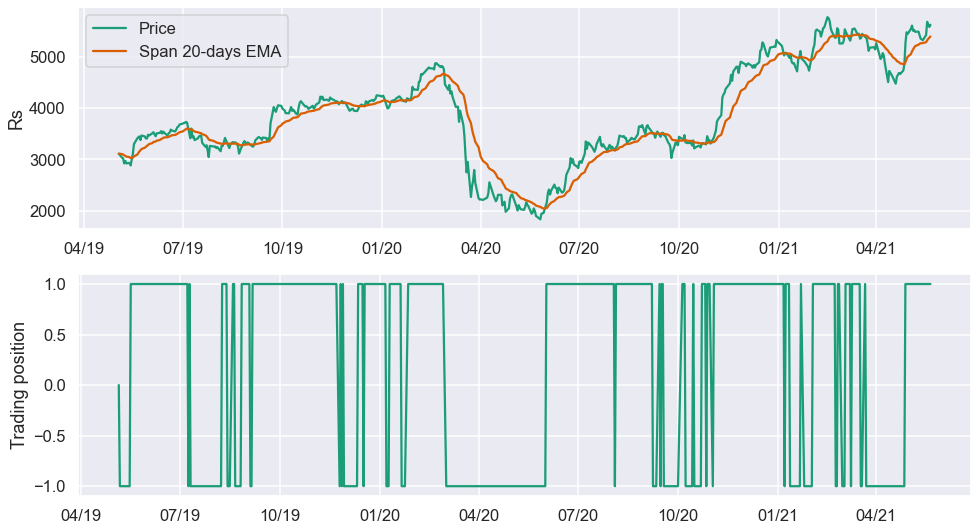

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))
start_date = '2019-05-03'
end_date = '2021-05-21'


ax1.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close'], label='Price')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = 'Span 20-days EMA')

ax1.set_ylabel('Rs')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'Close'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [11]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
asset_log_returns = np.log(data).diff()
asset_log_returns

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-06,-0.000974,-0.004827,-0.007166,-0.001457,-0.001457,-1.549357
2019-05-07,0.008089,0.007392,-0.006066,-0.009275,-0.009275,1.126067
2019-05-08,-0.015753,-0.022178,-0.023460,-0.025666,-0.025666,-0.341207
2019-05-09,-0.021677,-0.014842,-0.003542,0.003850,0.003850,-0.071878
...,...,...,...,...,...,...
2021-05-25,-0.006373,-0.007428,0.007742,0.000485,0.000485,-0.900875
2021-05-26,-0.000965,0.006950,0.005859,0.003148,0.003148,0.051661
2021-05-27,-0.000242,0.024186,0.002795,0.028016,0.028016,0.069545


In [12]:
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-25,-0.006373,-0.007428,0.007742,0.000485,0.000485,-0.900875
2021-05-26,-0.000965,0.006950,0.005859,0.003148,0.003148,-0.051661
2021-05-27,-0.000242,0.024186,0.002795,0.028016,0.028016,-0.069545
2021-05-28,0.037221,0.010782,0.019231,-0.007671,-0.007671,-0.356579
2021-05-31,-0.018556,-0.017683,-0.004773,0.005199,0.005199,-0.829815


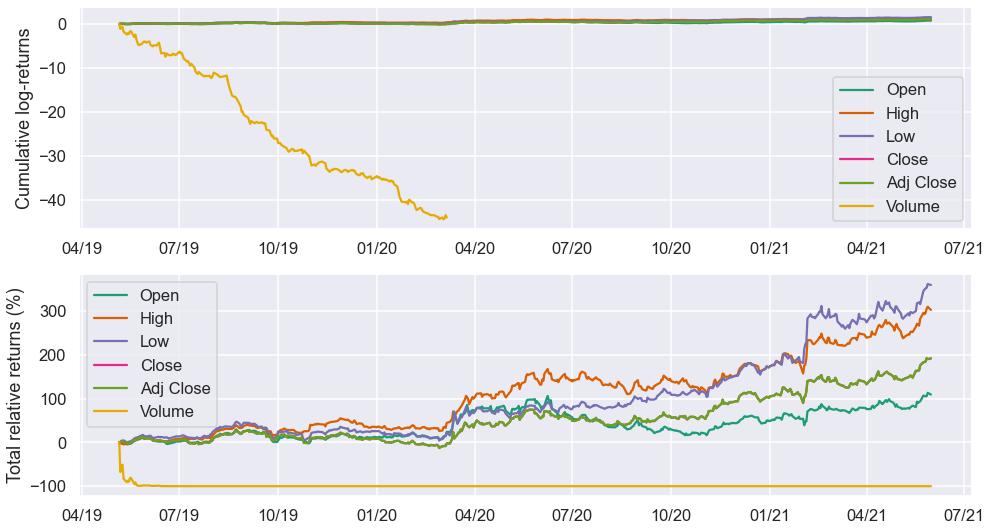

In [13]:
# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)


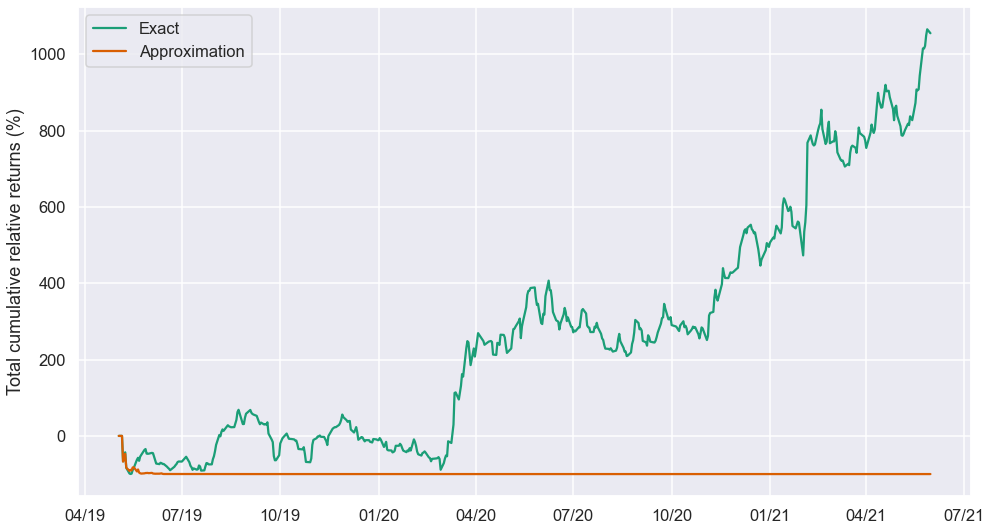

In [14]:
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = np.exp(cum_strategy_log_return) - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Exact')
ax.plot(cum_relative_return_approx.index, 100*cum_relative_return_approx, label='Approximation')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)


In [15]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: 1055.21%
Average yearly return is: 246.44%


Total portfolio return is: 54.99%
Average yearly return is: 24.92%


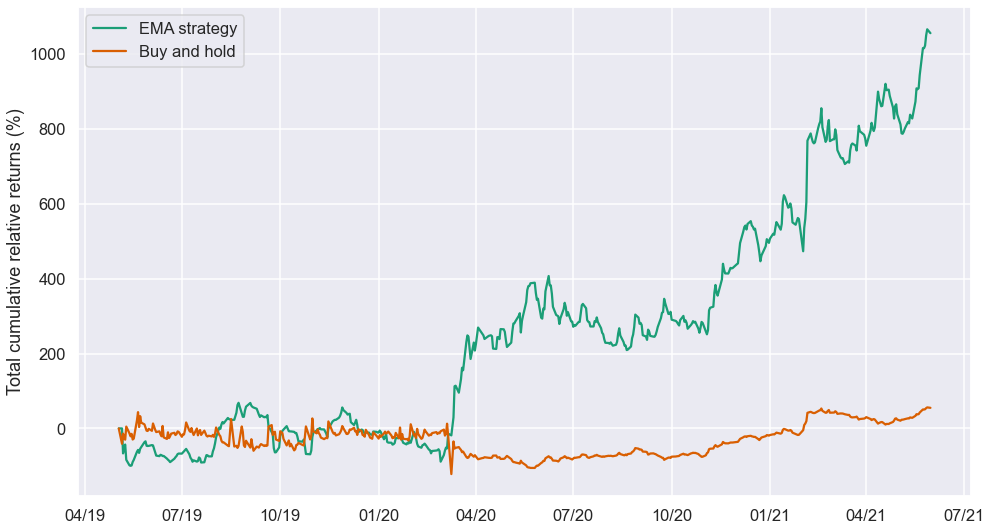

In [16]:
# Define the weights matrix for the simple buy-and-hold strategy
simple_weights_matrix = pd.DataFrame(1/3, index = data.index, columns=data.columns)

# Get the buy-and-hold strategy log returns per asset
simple_strategy_asset_log_returns = simple_weights_matrix * asset_log_returns

# Get the cumulative log-returns per asset
simple_cum_strategy_asset_log_returns = simple_strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
simple_cum_strategy_asset_relative_returns = np.exp(simple_cum_strategy_asset_log_returns) - 1

# Total strategy relative returns. This is the exact calculation.
simple_cum_relative_return_exact = simple_cum_strategy_asset_relative_returns.sum(axis=1)

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='EMA strategy')
ax.plot(simple_cum_relative_return_exact.index, 100*simple_cum_relative_return_exact, label='Buy and hold')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

print_portfolio_yearly_statistics(simple_cum_relative_return_exact)

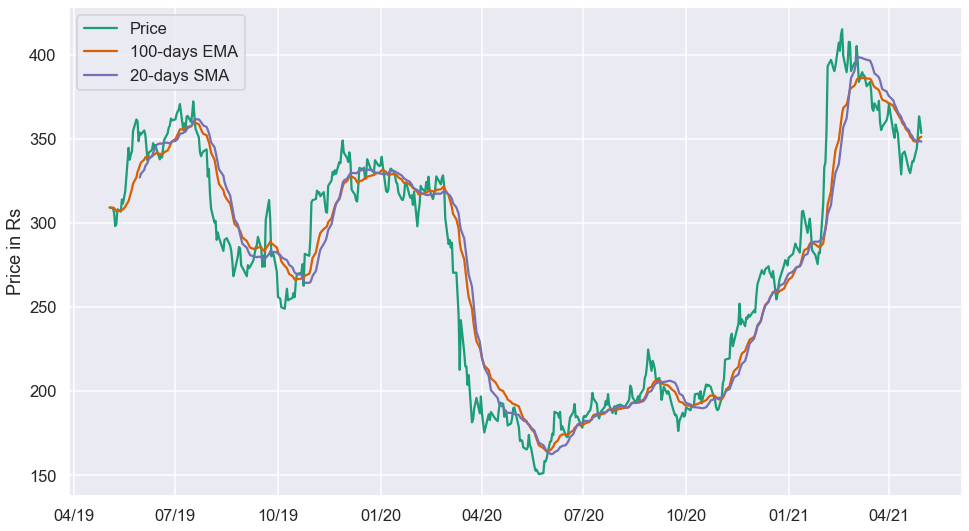

In [65]:
start_date = '2019-05-03'
end_date = '2021-05-03'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = '20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in Rs')
ax.xaxis.set_major_formatter(my_year_month_fmt)

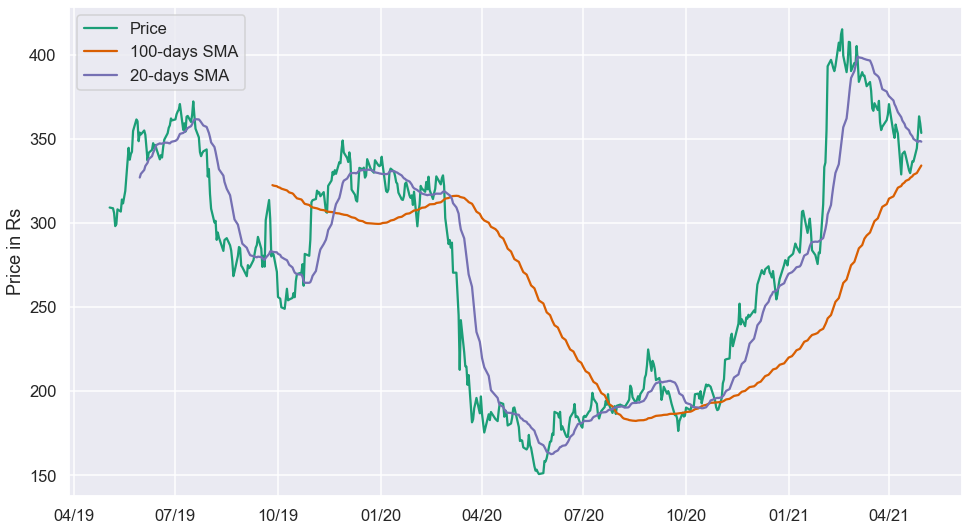

In [62]:
start_date = '2019-05-03'
end_date = '2021-05-03'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in Rs')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [18]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-03,3130.100098,3165.000000,3102.300049,3111.850098,3099.281738,730728
2019-05-06,3066.000000,3094.000000,3026.000000,3034.300049,3022.044678,966487
2019-05-07,3052.899902,3069.800049,3007.600098,3017.050049,3004.864258,970264
2019-05-08,3012.000000,3017.000000,2900.000000,2921.300049,2909.501221,1155023
2019-05-09,2900.000000,2991.800049,2885.000000,2971.350098,2959.349121,1745234
...,...,...,...,...,...,...
2021-05-25,5640.000000,5658.799805,5582.000000,5618.649902,5618.649902,1315546
2021-05-26,5640.000000,5794.799805,5586.100098,5771.149902,5771.149902,2916746
2021-05-27,5779.950195,5782.149902,5651.000000,5682.200195,5682.200195,2152590


In [17]:
data = yf.download('BAJFINANCE.NS', start="2019-05-03", end="2021-06-01")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-03,3130.100098,3165.000000,3102.300049,3111.850098,3099.281738,730728
2019-05-06,3066.000000,3094.000000,3026.000000,3034.300049,3022.044678,966487
2019-05-07,3052.899902,3069.800049,3007.600098,3017.050049,3004.864258,970264
2019-05-08,3012.000000,3017.000000,2900.000000,2921.300049,2909.501221,1155023
2019-05-09,2900.000000,2991.800049,2885.000000,2971.350098,2959.349121,1745234
...,...,...,...,...,...,...
2021-05-25,5640.000000,5658.799805,5582.000000,5618.649902,5618.649902,1315546
2021-05-26,5640.000000,5794.799805,5586.100098,5771.149902,5771.149902,2916746
2021-05-27,5779.950195,5782.149902,5651.000000,5682.200195,5682.200195,2152590


In [16]:
#df = pd.read_csv('BHARTIARTL.csv')
data['20d_EMA'] = data.Close.ewm(span=20, adjust=False).mean()
data['40d_EMA'] = data.Close.ewm(span=40, adjust=False).mean()


start_date = pd.to_datetime('2019-05-03')
end_date = pd.to_datetime('2021-05-21') 
new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
df1 = df.loc[new_df]
stock_data = df1.set_index('Date')
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(stock_data.index, stock_data[["Close",'40d_EMA','20d_EMA']])
plt.title('Historical stock prices of SBI [2019-05-03 to 2021-05-03]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_data.index, stock_data['Volume'])
plt.title('\nSBI Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)

KeyError: 'Date'

In [22]:
df = yf.download('BHARTIARTL.NS', start="2020-05-03", end="2021-05-21",index_col=False)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-04,502.450012,540.000000,499.899994,532.500000,530.594666,34019449
2020-05-05,538.000000,553.700012,526.049988,528.049988,526.160583,29936905
2020-05-06,531.750000,551.450012,530.049988,546.000000,544.046326,25594154
2020-05-07,545.349976,545.349976,524.450012,528.049988,526.160583,15532117
2020-05-08,540.000000,545.799988,528.299988,530.049988,528.153381,13592411
...,...,...,...,...,...,...
2021-05-14,564.000000,569.349976,556.150024,560.400024,560.400024,7555855
2021-05-17,563.950012,563.950012,545.799988,549.650024,549.650024,13424956
2021-05-18,547.500000,552.900024,534.549988,536.349976,536.349976,34324460


In [19]:
df

,Open,High,Low,Close,Adj Close,Volume,20d_EMA,40d_EMA
Date,,,,,,,,
2020-05-04,502.450012,540.000000,499.899994,532.500000,530.594666,34019449,532.500000,532.500000
2020-05-05,538.000000,553.700012,526.049988,528.049988,526.160583,29936905,532.076189,532.282926
2020-05-06,531.750000,551.450012,530.049988,546.000000,544.046326,25594154,533.402267,532.952052
2020-05-07,545.349976,545.349976,524.450012,528.049988,526.160583,15532117,532.892526,532.712927
2020-05-08,540.000000,545.799988,528.299988,530.049988,528.153381,13592411,532.621808,532.583027
...,...,...,...,...,...,...,...,...
2021-05-14,564.000000,569.349976,556.150024,560.400024,560.400024,7555855,551.211232,546.031976
2021-05-17,563.950012,563.950012,545.799988,549.650024,549.650024,13424956,551.062546,546.208466
2021-05-18,547.500000,552.900024,534.549988,536.349976,536.349976,34324460,549.661348,545.727564


In [25]:
df['index']

KeyError: 'index'

In [27]:

df['20d_EMA'] = df.Close.ewm(span=20, adjust=False).mean()
df['40d_EMA'] = df.Close.ewm(span=40, adjust=False).mean()


start_date = pd.to_datetime('2019-05-04')
end_date = pd.to_datetime('2021-05-03') 
new_df = (df.index>= start_date) & (df.index<= end_date)
df1 = df.loc[new_df]
stock_data = df1.set_index()
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(stock_data.index, stock_data[["Close",'40d_EMA','20d_EMA']])
plt.title('Historical stock prices of Airtel [2020-05-04 to 2021-05-03]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_data.index, stock_data['Volume'])
plt.title('\nAirtel Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)

TypeError: set_index() missing 1 required positional argument: 'keys'

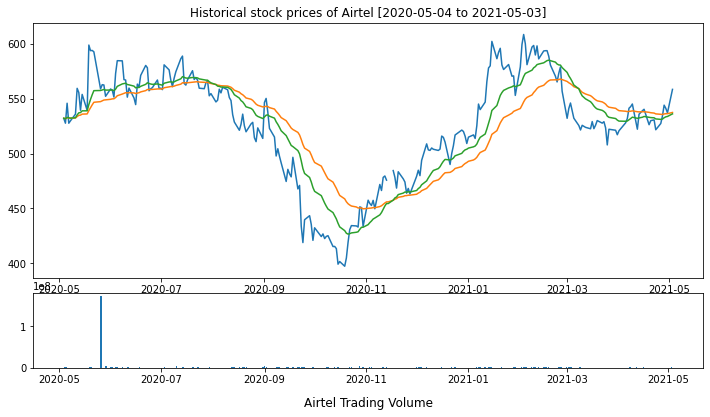

In [34]:
df['Date'] = pd.to_datetime(df['Date']) 

start_date = pd.to_datetime('2020-05-04')
end_date = pd.to_datetime('2021-05-03') 
new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
df1 = df.loc[new_df]
stock_data = df1.set_index('Date')
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(stock_data.index, stock_data[["Close",'40d_EMA','20d_EMA']])
plt.title('Historical stock prices of Airtel [2020-05-04 to 2021-05-03]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_data.index, stock_data['Volume'])
plt.title('\nAirtel Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)

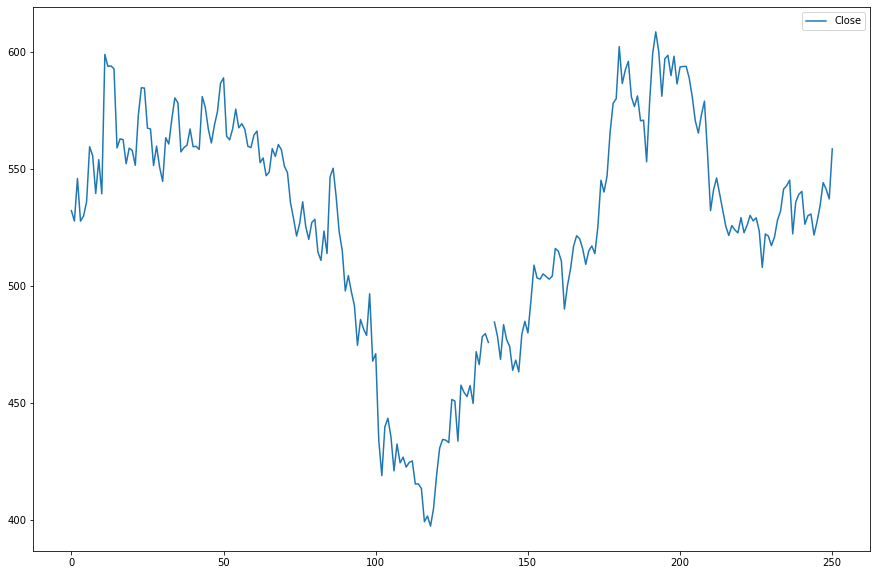

In [18]:
#visualization
plt.figure(figsize=(10,5))
df['Close'].plot(figsize=(15,10))
plt.legend()
plt.show()

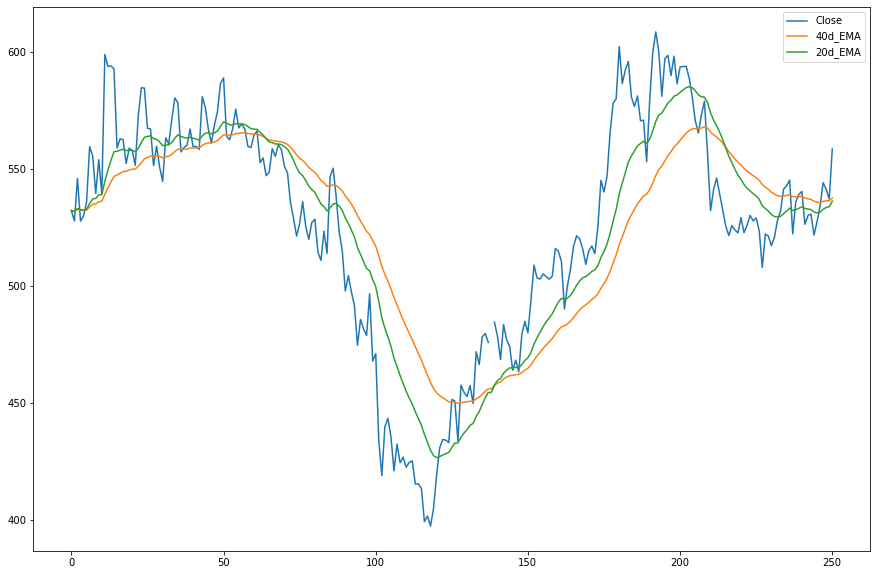

In [23]:
df['20d_EMA'] = df.Close.ewm(span=20, adjust=False).mean()
df['40d_EMA'] = df.Close.ewm(span=40, adjust=False).mean()
#df['middle'] = df.Close.ewm(span=71, adjust=False).mean()
df[['Close','40d_EMA','20d_EMA']].plot(figsize=(15,10))
plt.show()

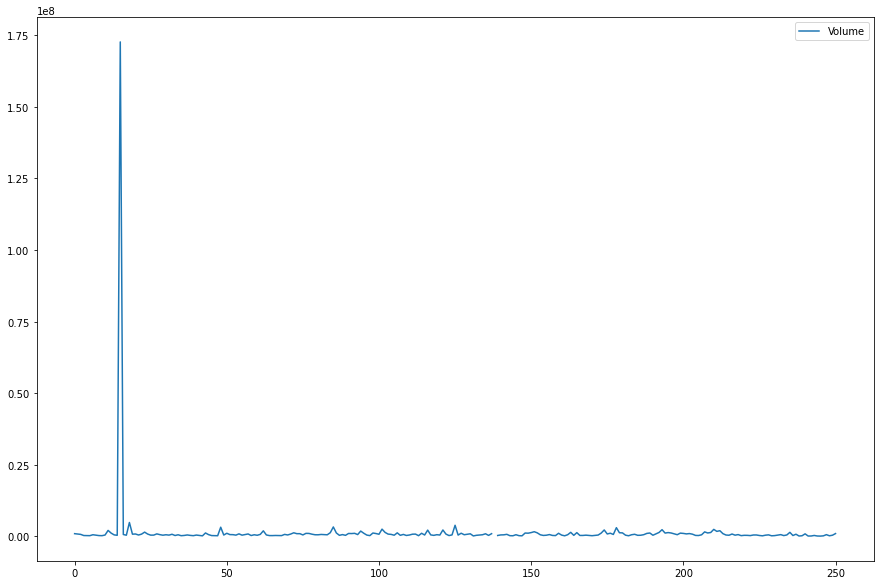

In [25]:
df[['Volume']].plot(figsize=(15,10))
plt.show()

In [21]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,20d_EMA,40d_EMA
0,2020-05-04,510.000000,540.049988,499.000000,532.299988,530.395020,975688.0,532.299988,532.299988
1,2020-05-05,539.950012,553.500000,526.049988,527.849976,525.960938,856677.0,531.876177,532.082914
2,2020-05-06,533.000000,551.349976,530.799988,546.049988,544.095764,726696.0,533.226064,532.764235
3,2020-05-07,546.799988,546.799988,524.599976,527.799988,525.911133,327050.0,532.709295,532.522077
4,2020-05-08,539.849976,545.849976,528.500000,530.000000,528.103271,312522.0,532.451267,532.399048
...,...,...,...,...,...,...,...,...,...
246,2021-04-27,528.000000,538.400024,526.950012,534.450012,534.450012,211144.0,531.620596,535.826236
247,2021-04-28,536.000000,547.950012,536.000000,544.299988,544.299988,634840.0,532.828157,536.239589
248,2021-04-29,547.200012,549.950012,539.150024,541.400024,541.400024,237453.0,533.644525,536.491318
249,2021-04-30,535.500000,546.900024,533.349976,537.299988,537.299988,437898.0,533.992664,536.530765


In [9]:
start_date = '2020-05-04'
end_date = '2021-05-03'
ema_short = df.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'MSFT'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'MSFT'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'MSFT'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

'2020-05-05'

In [16]:
ema_short = df.ewm(span=20, adjust=False).mean()

In [17]:
ema_short

,Open,High,Low,Close,Adj Close,Volume
0,510.000000,540.049988,499.000000,532.299988,530.395020,975688.000000
1,512.852382,541.330942,501.576189,531.876177,529.972726,964353.619048
2,514.771203,542.285135,504.359408,533.226064,531.317778,941719.560091
3,517.821563,542.715121,506.287081,532.709295,530.802859,883179.601987
4,519.919507,543.013679,508.402597,532.451267,530.545755,828831.258940
...,...,...,...,...,...,...
246,532.433270,537.722077,525.936707,531.620596,531.620596,401353.658926
247,532.772958,538.696166,526.895116,532.828157,532.828157,423590.453314
248,534.146963,539.767961,528.062250,533.644525,533.644525,405863.076808
249,534.275824,540.447205,528.565843,533.992664,533.992664,408914.021874
